<a href="https://colab.research.google.com/github/Angelica2929/BI_Project_AIRBNB/blob/main/Project_2_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Lerning Project!** 
# ***Airbnb Open Data***

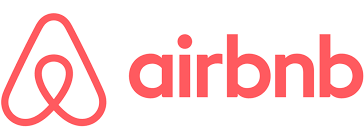


Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in New York City.

**Source**:https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata?select=Airbnb_Open_Data.csv

**Acknowledgment**:This dataset is part of Airbnb Inside but I tried to make new columns and many data inconsistency issue to create a new dataset to practice data cleaning. 

The original source can be found here http://insideairbnb.com/explore/

**Explanation video**: https://drive.google.com/drive/u/1/folders/1u4B5fQa6tqJMhHxJV04uY3HSMd4wKMUI

**PPT**: https://drive.google.com/drive/u/1/folders/1q4Ft6jdMhQf-Z6LGYgDRqzkgF3rjm5gb



# **AIM**
Whas is the price of a airbnb according to our set of characteristics? I will focus in predict the price of a stay according to the location.

# **1.Loading Information**

---



Import libraries to start working

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set(font_scale=1)

Load the dataset chosen

In [11]:
df_airnb = pd.read_csv('/content/drive/MyDrive/CODING DOJO/ARCHIVOS APOYO/Airbnb_Open_Data.csv', index_col = 'id')

df_airnb.head(5)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
id,,,,,,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2.Exploring the data**

---



Let's see how is about our dataset

In [13]:
df_airnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102599 entries, 1001254 to 6094647
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   NAME                            102349 non-null  object 
 1   host id                         102599 non-null  int64  
 2   host_identity_verified          102310 non-null  object 
 3   host name                       102193 non-null  object 
 4   neighbourhood group             102570 non-null  object 
 5   neighbourhood                   102583 non-null  object 
 6   lat                             102591 non-null  float64
 7   long                            102591 non-null  float64
 8   country                         102067 non-null  object 
 9   country code                    102468 non-null  object 
 10  instant_bookable                102494 non-null  object 
 11  cancellation_policy             102523 non-null  object 
 12  room type

In [14]:
df_airnb.shape

(102599, 25)

In [15]:
df_airnb.size

2564975

Our dataset is shaped by a total of **2.564.975** registers, distribuited like this:


102.599 Rows

26 columnns 

It means 25 columns conform the set of characteristics if I dont count my target variable.

In [16]:
df_airnb.describe()

,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [17]:
df_airnb.describe().T

,count,mean,std,min,25%,50%,75%,max
host id,102599.0,4.925411e+10,2.853900e+10,1.236005e+08,2.458333e+10,4.911774e+10,7.399650e+10,9.876313e+10
lat,102591.0,4.072809e+01,5.585652e-02,4.049979e+01,4.068874e+01,4.072229e+01,4.076276e+01,4.091697e+01
long,102591.0,-7.394964e+01,4.952126e-02,-7.424984e+01,-7.398258e+01,-7.395444e+01,-7.393235e+01,-7.370522e+01
Construction year,102385.0,2.012487e+03,5.765556e+00,2.003000e+03,2.007000e+03,2.012000e+03,2.017000e+03,2.022000e+03
minimum nights,102190.0,8.135845e+00,3.055378e+01,-1.223000e+03,2.000000e+00,3.000000e+00,5.000000e+00,5.645000e+03
number of reviews,102416.0,2.748374e+01,4.950895e+01,0.000000e+00,1.000000e+00,7.000000e+00,3.000000e+01,1.024000e+03
reviews per month,86720.0,1.374022e+00,1.746621e+00,1.000000e-02,2.200000e-01,7.400000e-01,2.000000e+00,9.000000e+01
review rate number,102273.0,3.279106e+00,1.284657e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
calculated host listings count,102280.0,7.936605e+00,3.221878e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.320000e+02
availability 365,102151.0,1.411333e+02,1.354350e+02,-1.000000e+01,3.000000e+00,9.600000e+01,2.690000e+02,3.677000e+03


# **3.Cleaning our data**

---



**Indentify null values in our dataset**

Let's identify the null values then I should order the columns with null variables in ascending order , this to know how we are going to impute them.

In [18]:
df_airnb.isna().sum().sort_values(ascending=False)

license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 250
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
host id                                0
room type       

In [19]:
print(df_airnb.isna().sum().sum(), 'missing values')

190769 missing values


Findings:

*There are 190.769 missing values

*The dataset is shaped by categorical and numerical variables

**Indentify duplicated values**

In [20]:
df_airnb.duplicated().sum()

541

The dataset has 541 duplicated values, we just have to remove them.

In [21]:
df_airnb = df_airnb.drop_duplicates()
df_airnb.duplicated().sum()

0

The duplicates were removed.

In [22]:
#df = pd.DataFrame(df_airnb)
#df = df_airnb.fillna(0)


All the NaN Values were replaced by 0, now It is accurate to imputate them.

In [23]:
datos_null = ['neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy',
       'room type', 'Construction year', 'price', 'service fee',
       'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365',]
for dato in datos_null:
    q_null = df_airnb[df_airnb[dato] == 0][dato].count()
    print(f'{dato} contiene {q_null} datos null: Representan el {round(q_null*100/df_airnb["price"].count(), 2)}% del conjunto de datos')

neighbourhood group contiene 0 datos null: Representan el 0.0% del conjunto de datos
neighbourhood contiene 0 datos null: Representan el 0.0% del conjunto de datos
lat contiene 0 datos null: Representan el 0.0% del conjunto de datos
long contiene 0 datos null: Representan el 0.0% del conjunto de datos
country contiene 0 datos null: Representan el 0.0% del conjunto de datos
country code contiene 0 datos null: Representan el 0.0% del conjunto de datos
instant_bookable contiene 51186 datos null: Representan el 50.28% del conjunto de datos
cancellation_policy contiene 0 datos null: Representan el 0.0% del conjunto de datos
room type contiene 0 datos null: Representan el 0.0% del conjunto de datos
Construction year contiene 0 datos null: Representan el 0.0% del conjunto de datos
price contiene 0 datos null: Representan el 0.0% del conjunto de datos
service fee contiene 0 datos null: Representan el 0.0% del conjunto de datos
minimum nights contiene 0 datos null: Representan el 0.0% del conju

Findings:

*It is notorious that the license column has only 2 registered data, it is appropriate to eliminate it, since being information inherent to each host it cannot be replaced with any statistical inference.

*For the Instant Bookable column, the number 0 does not indicate null data, since it is a binary variable so they should not be eliminated, for the rest of columns the values are replaced by 1 and 0.

**Verify the name of our columns or set of characteristics**

In [24]:
columns_names = df_airnb.columns.values
columns_names

array(['NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy',
       'room type', 'Construction year', 'price', 'service fee',
       'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365',
       'house_rules', 'license'], dtype=object)

**Impute the null values according your previous and consistent analysis**




It's accurate to eliminate the column *License* , it is completely empty (it has 2 registers).
Also the columns named like *house rules, guest's name , host id and host name*, they are irrelevant to predict the price of a airbnb stay, for that reason I eliminate them. 

In [25]:
#Let's the new dataframe
df_airnb = df_airnb.drop(columns=['license','house_rules','NAME','host id','host_identity_verified','host name'])
df_airnb.head()

,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
id,,,,,,,,,,,,,,,,,,,
1001254,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1002102,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
1002403,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0
1002755,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
1003689,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0


Ensure Consistency in Categorical Values!

In [26]:
df_airnb['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [27]:

df_airnb['neighbourhood group'] = df_airnb['neighbourhood group'].replace('brookln', 'Brooklyn') 
df_airnb['neighbourhood group'] = df_airnb['neighbourhood group'].replace('manhatan', 'Manhattan')
df_airnb['neighbourhood group'] = df_airnb['neighbourhood group'].replace('nan', 'Missing')
df_airnb['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', nan, 'Staten Island', 'Bronx'],
      dtype=object)

In [28]:
df_airnb['neighbourhood group'].value_counts()

Manhattan        43558
Brooklyn         41631
Queens           13197
Bronx             2694
Staten Island      949
Name: neighbourhood group, dtype: int64

Non-uniform categorical data is identified, the data is cleaned.

I explore the data registered in neighbourhood column in order to identify categorical mistakes.

In [29]:
df_airnb['neighbourhood'].value_counts()

Bedford-Stuyvesant        7898
Williamsburg              7732
Harlem                    5441
Bushwick                  4956
Hell's Kitchen            3949
                          ... 
Willowbrook                  3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: neighbourhood, Length: 224, dtype: int64

In [30]:
df_airnb['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [31]:
df_airnb['country code'].value_counts()

US    101927
Name: country code, dtype: int64

In [32]:
df_airnb['country'].value_counts()

United States    101526
Name: country, dtype: int64

In [33]:
df_airnb['instant_bookable'].value_counts()

False    51186
True     50767
Name: instant_bookable, dtype: int64

This variable is a binary variable, the values 0 do not indicate null numbers, it identifies that the value of the boolean variable is TRUE.

In [34]:
df_airnb['room type'].value_counts()

Entire home/apt    53429
Private room       46306
Shared room         2208
Hotel room           115
Name: room type, dtype: int64

In [35]:
df_airnb['cancellation_policy'].value_counts()

moderate    34162
strict      33929
flexible    33891
Name: cancellation_policy, dtype: int64

In [36]:
df_airnb['review rate number'].value_counts()

5.0    23251
4.0    23200
3.0    23130
2.0    22972
1.0     9186
Name: review rate number, dtype: int64

In [37]:
df_airnb.shape
df_airnb.nunique()

neighbourhood group                   5
neighbourhood                       224
lat                               21991
long                              17774
country                               1
country code                          1
instant_bookable                      2
cancellation_policy                   3
room type                             4
Construction year                    20
price                              1151
service fee                         231
minimum nights                      153
number of reviews                   476
last review                        2477
reviews per month                  1016
review rate number                    5
calculated host listings count       78
availability 365                    438
dtype: int64

**Correct the type of our data in order to wowrk with our data**

It is necessary to correct the data types, it shows the price  and service fee variables as categorical because they have a peso sign,but they are numbers, therefore we must adjust it.

In [38]:
df_airnb["price"]

id
1001254       $966 
1002102       $142 
1002403       $620 
1002755       $368 
1003689       $204 
             ...   
57365208      $696 
57365760      $909 
57366313      $387 
57366865      $848 
57367417    $1,128 
Name: price, Length: 102058, dtype: object

In [39]:
df_airnb["price"] = df_airnb["price"].apply(lambda x: str(x).replace("$", ""))
df_airnb['price'] = df_airnb['price'].apply(lambda x: x.replace(',', ''))
df_airnb['price'] = df_airnb['price'].astype(float)
df_airnb.price

id
1001254      966.0
1002102      142.0
1002403      620.0
1002755      368.0
1003689      204.0
             ...  
57365208     696.0
57365760     909.0
57366313     387.0
57366865     848.0
57367417    1128.0
Name: price, Length: 102058, dtype: float64

In [40]:
df_airnb["service fee"] = df_airnb["service fee"].apply(lambda x: str(x).replace("$", ""))
df_airnb['service fee'] = df_airnb['service fee'].astype(float)
df_airnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102058 entries, 1001254 to 57367417
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   neighbourhood group             102029 non-null  object 
 1   neighbourhood                   102042 non-null  object 
 2   lat                             102050 non-null  float64
 3   long                            102050 non-null  float64
 4   country                         101526 non-null  object 
 5   country code                    101927 non-null  object 
 6   instant_bookable                101953 non-null  object 
 7   cancellation_policy             101982 non-null  object 
 8   room type                       102058 non-null  object 
 9   Construction year               101844 non-null  float64
 10  price                           101811 non-null  float64
 11  service fee                     101785 non-null  float64
 12  minimum 

Now let's imputate the null values at these variables.

In [41]:
#I imputate the null values at this column with the mean
df_airnb.loc[df_airnb[df_airnb['price'].apply(lambda x: x) > 2022].index,'price'] = df_airnb['price'].mean()
df_airnb.loc[df_airnb['price'].isnull(), 'price'] = df_airnb['price'].mean()

In [42]:
df_airnb['price'].isna().sum()

0

In [43]:
#I imputate the null values at this column with the mean
df_airnb.loc[df_airnb[df_airnb['service fee'].apply(lambda x: x) > 2022].index,'service fee'] = df_airnb['service fee'].mean()
df_airnb.loc[df_airnb['service fee'].isnull(), 'service fee'] = df_airnb['service fee'].mean()

In [44]:
df_airnb['service fee'].isna().sum()

0

The data type of the Last Review column is changed from object to date, like this:

In [45]:
df_airnb['last review'] = pd.to_datetime(df_airnb['last review'])
df_airnb.dtypes

neighbourhood group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
country                                   object
country code                              object
instant_bookable                          object
cancellation_policy                       object
room type                                 object
Construction year                        float64
price                                    float64
service fee                              float64
minimum nights                           float64
number of reviews                        float64
last review                       datetime64[ns]
reviews per month                        float64
review rate number                       float64
calculated host listings count           float64
availability 365                         float64
dtype: object

In [46]:
# Let's check the min and max timestamps
df_airnb['last review'].min(), df_airnb['last review'].max()

(Timestamp('2012-07-11 00:00:00'), Timestamp('2058-06-16 00:00:00'))

In [47]:
#There is a mistake with the year , it shows 2058, I fix it
df_airnb.loc[df_airnb[df_airnb['last review'].apply(lambda x: x.year) > 2022].index,'last review'] = df_airnb['last review'].median()
df_airnb.loc[df_airnb['last review'].isnull(), 'last review'] = df_airnb['last review'].median()
df_airnb['last review'].isnull().value_counts()
df_airnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102058 entries, 1001254 to 57367417
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   neighbourhood group             102029 non-null  object        
 1   neighbourhood                   102042 non-null  object        
 2   lat                             102050 non-null  float64       
 3   long                            102050 non-null  float64       
 4   country                         101526 non-null  object        
 5   country code                    101927 non-null  object        
 6   instant_bookable                101953 non-null  object        
 7   cancellation_policy             101982 non-null  object        
 8   room type                       102058 non-null  object        
 9   Construction year               101844 non-null  float64       
 10  price                           102058 non-null 

In [48]:
#Null values at this columns represents the 0.43% within the total of rows, so I elimina
df_airnb.dropna(subset=['availability 365'], inplace=True)
df_airnb.isna().sum()

neighbourhood group                  18
neighbourhood                        15
lat                                   8
long                                  8
country                             525
country code                        124
instant_bookable                     98
cancellation_policy                  69
room type                             0
Construction year                   195
price                                 0
service fee                           0
minimum nights                      378
number of reviews                   129
last review                           0
reviews per month                 15557
review rate number                  305
calculated host listings count      319
availability 365                      0
dtype: int64

In [49]:
df_airnb['availability 365'] = df_airnb['availability 365'].astype(int)


In [50]:
df_airnb.isna().sum()

neighbourhood group                  18
neighbourhood                        15
lat                                   8
long                                  8
country                             525
country code                        124
instant_bookable                     98
cancellation_policy                  69
room type                             0
Construction year                   195
price                                 0
service fee                           0
minimum nights                      378
number of reviews                   129
last review                           0
reviews per month                 15557
review rate number                  305
calculated host listings count      319
availability 365                      0
dtype: int64

In [51]:
#df_airnb.dropna(subset=['availability 365'], inplace=True)
#df_airnb.isna().sum()

In [52]:
df_airnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101610 entries, 1001254 to 57367417
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   neighbourhood group             101592 non-null  object        
 1   neighbourhood                   101595 non-null  object        
 2   lat                             101602 non-null  float64       
 3   long                            101602 non-null  float64       
 4   country                         101085 non-null  object        
 5   country code                    101486 non-null  object        
 6   instant_bookable                101512 non-null  object        
 7   cancellation_policy             101541 non-null  object        
 8   room type                       101610 non-null  object        
 9   Construction year               101415 non-null  float64       
 10  price                           101610 non-null 

In [53]:
#Impute both columns with United States and US , like this
df_airnb['country'].fillna('United States', inplace=True)
df_airnb['country'].isna().sum()

0

In [54]:
df_airnb['country code'].fillna('US', inplace=True)
df_airnb['country code'].isna().sum()

0

In [55]:
df_airnb['country'].isna().sum()

0

Impute null values with the mean of the other data from that same 'reviews per month' column, the same is replicated with the last 'review' column

In [56]:
df_airnb.loc[df_airnb[df_airnb['reviews per month'].apply(lambda x: x) == 0].index,'reviews per month'] = df_airnb['reviews per month'].mean()
df_airnb.loc[df_airnb['reviews per month'].isnull(), 'reviews per month'] = df_airnb['reviews per month'].mean()

In [57]:
df_airnb.loc[df_airnb[df_airnb['last review'].apply(lambda x: x) == 0].index,'last review'] = df_airnb['last review'].mean()
df_airnb.loc[df_airnb['last review'].isnull(), 'last review'] = df_airnb['last review'].mean()

In [58]:
df_airnb.loc[df_airnb[df_airnb['review rate number'].apply(lambda x: x) == 0].index,'review rate number'] = df_airnb['review rate number'].mean()
df_airnb.loc[df_airnb['review rate number'].isnull(), 'review rate number'] = df_airnb['review rate number'].mean()

In [59]:
df_airnb.dropna(subset=['neighbourhood group', 'neighbourhood', 'lat', 'long', 'instant_bookable', 'cancellation_policy',
       'Construction year', 'minimum nights',
       'number of reviews', 
       'review rate number', 'calculated host listings count'], inplace=True)


At this columns I decided to eliminate null values because they are accurate information of each booking case, it is difficult to imputate it.

In [60]:
df_airnb.isna().sum()

neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

In [61]:
df_airnb.shape

(100487, 19)

There are no Nan Values, they were eliminated because the represented a 
low proportion with respect to the totality of the data. After this imputation and cleaning of our data, 2112 rows were eliminated, it represents the 2.05%, no we can visualize the data.

# **Data Visualization**



---





**Let's take a look at the correlation between our variables**

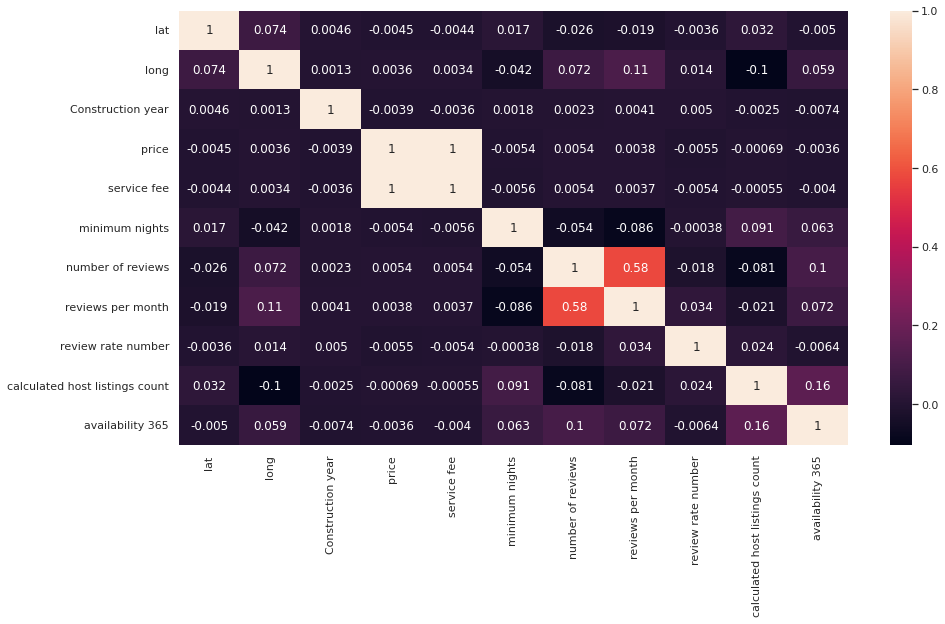

In [62]:
import seaborn as sns
corr = df_airnb.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_airnb.corr(),annot = True)


I noticed strong correlation between service fee and price . It is important to highlight that the correlation among our variable target and the other variables is pretty low, also price has the stronger correlation with number of reviews, it works as a supply and demand game.

**Import the visualization libraries**

In [63]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [64]:
price_per_year = df_airnb.groupby('Construction year')['price'].mean()
fig = px.line(price_per_year,
            x=price_per_year.index,
            y=price_per_year.values,
            labels={'x': 'Construction year', 'y': 'Average price'},
            text=['$' + str(int(i)) for i in price_per_year.values],
            title='Average price per construction year in USD',
            color_discrete_sequence=px.colors.sequential.Teal_r,
            template='plotly_dark'
)

fig.update_layout(font=dict(size=15, color='white', family='Avenir'))

fig.show()

In [65]:
price_per_neighbourhood = df_airnb.groupby('neighbourhood group')['price'].mean()
fig = px.line(price_per_neighbourhood,
            x=price_per_neighbourhood.index,
            y=price_per_neighbourhood.values,
            labels={'x': 'neighbourhood group', 'y': 'Average price'},
            text=['$' + str(int(i)) for i in price_per_neighbourhood.values],
            title='Average price per Neighbourhood',
            color_discrete_sequence=px.colors.sequential.Teal_r,
            template='plotly_dark'
)

fig.update_layout(font=dict(size=15, color='white', family='Avenir'))

fig.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



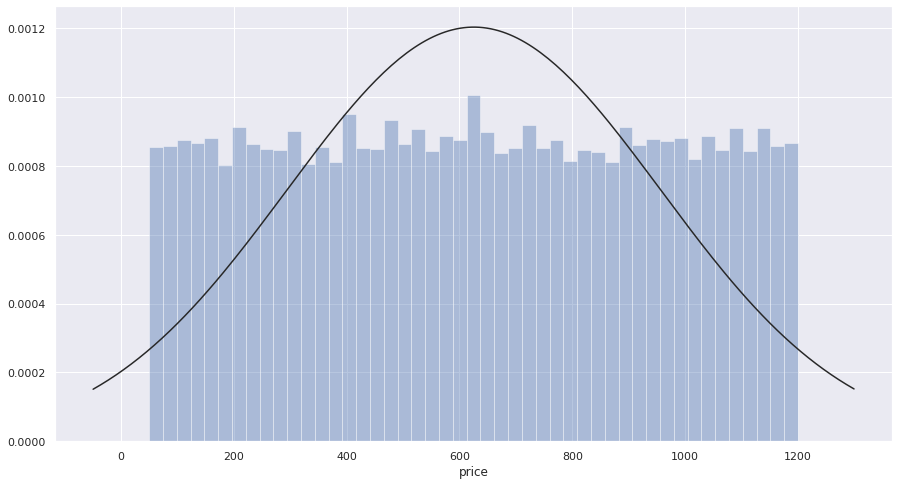

In [66]:
from scipy.stats import norm
ax = sns.distplot(df_airnb['price'], fit=norm, kde=False)

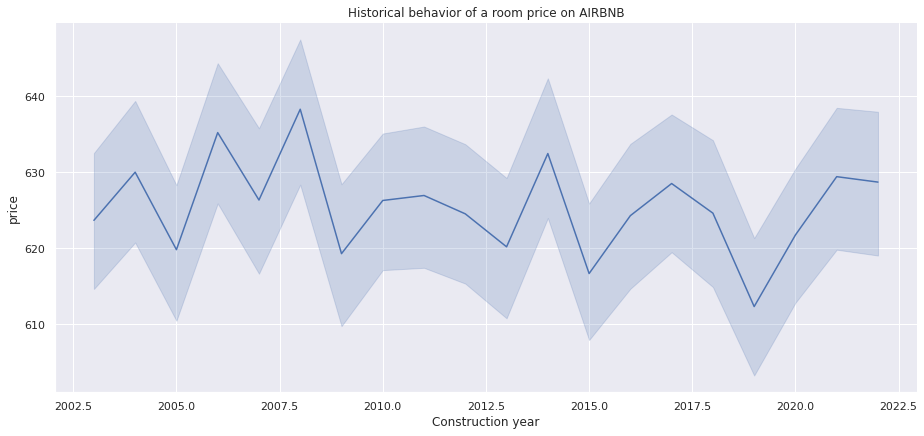

In [67]:
sns.relplot(x = df_airnb['Construction year'], y = df_airnb['price'], data = df_airnb, kind = "line", palette ='#2471A3', height=6, aspect=13/6).set(title='Historical behavior of a room price on AIRBNB')

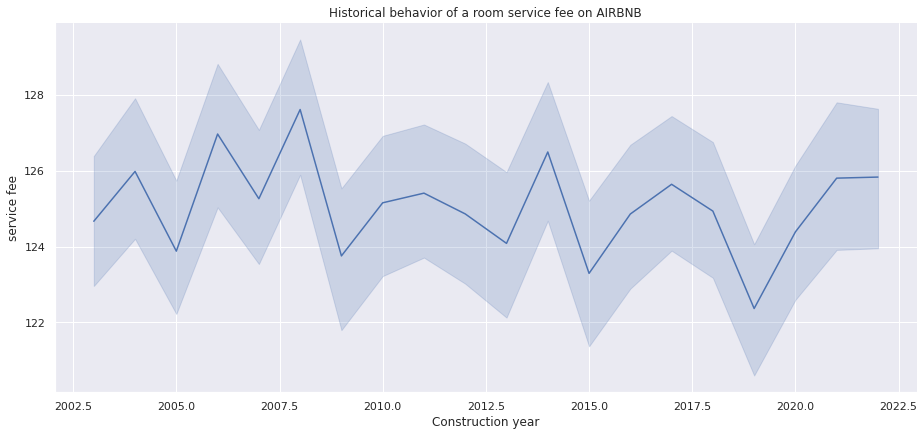

In [68]:
sns.relplot(x = df_airnb['Construction year'], y = df_airnb['service fee'], data = df_airnb, kind = "line", palette ='#2471A3', height=6, aspect=13/6).set(title='Historical behavior of a room service fee on AIRBNB')

The plot shows us the behavior through the years of the arbnb price, there was a significant drop in 2008, which is consistent with the economic crisis that took place during that year.

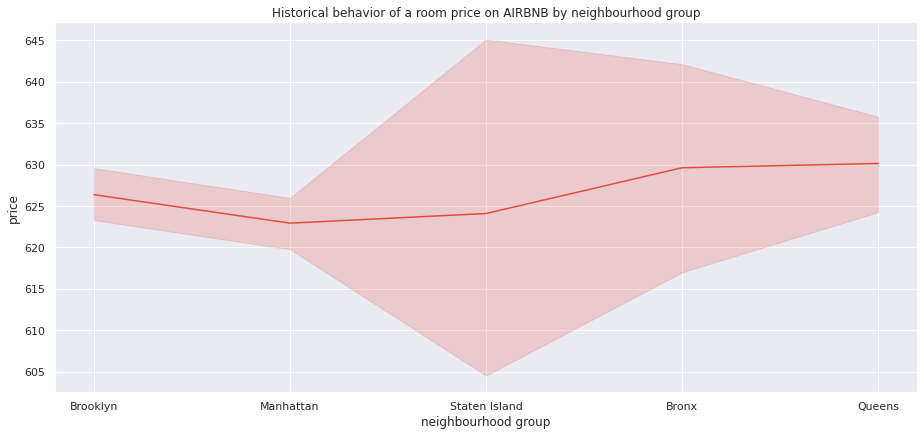

In [69]:
sns.relplot(x = df_airnb['neighbourhood group'], y = df_airnb['price'], data = df_airnb, kind = "line", color='#E74C3C', height=6, aspect=13/6).set(title='Historical behavior of a room price on AIRBNB by neighbourhood group')

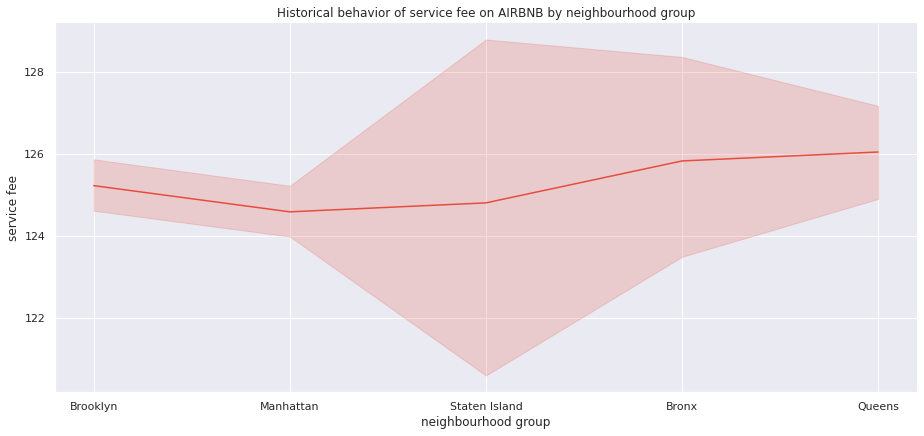

In [70]:
sns.relplot(x = df_airnb['neighbourhood group'], y = df_airnb['service fee'], data = df_airnb, kind = "line", color='#E74C3C', height=6, aspect=13/6).set(title='Historical behavior of service fee on AIRBNB by neighbourhood group')

Service fee and price has a strong correlation, that's the reason we see the same plot but with a different scale.

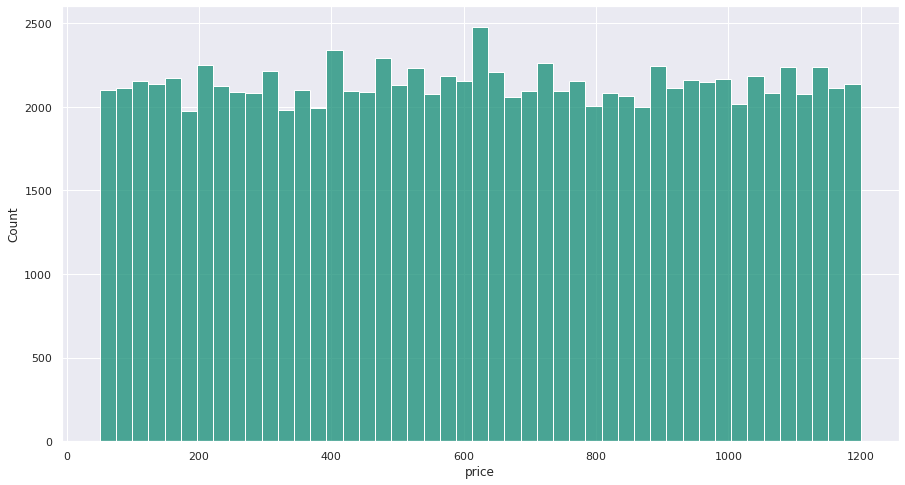

In [71]:
sns.histplot(data=df_airnb, x="price", color = '#138D75')

The previous histogram show us the majority of our sample of study is located in Brooklyn and Manhattan.

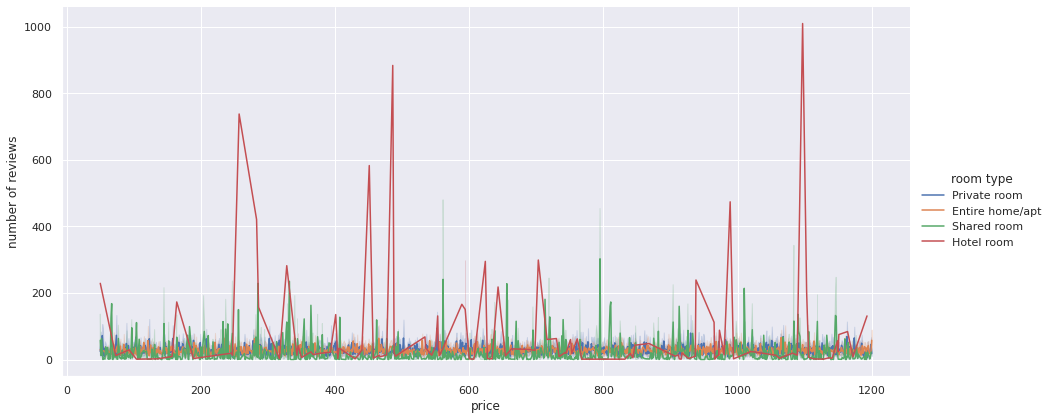

In [72]:
sns.relplot(data=df_airnb, kind='line', x='price',  y='number of reviews', hue='room type',height=6, aspect=13/6);

[Text(0.5, 1.0, 'Price by Room Type')]

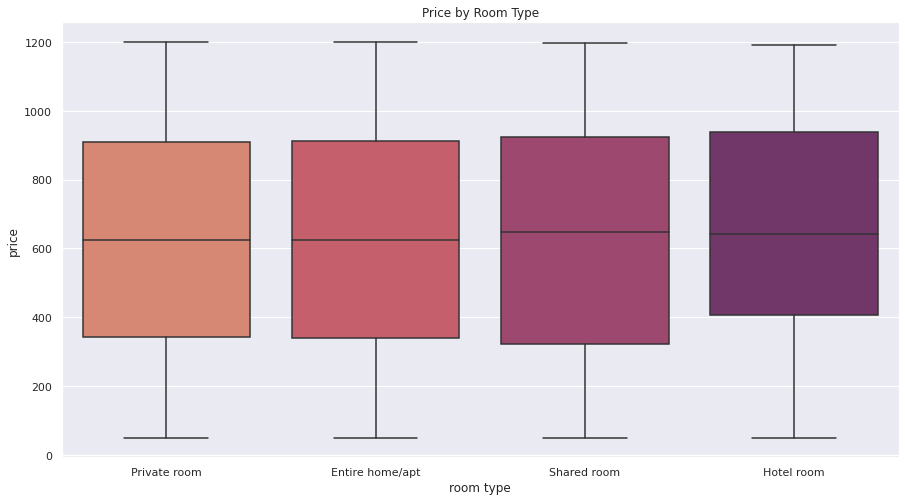

In [73]:
sns.boxplot(y = 'price',       
            x = 'room type',    
            data = df_airnb,
            palette = 'flare'
            ).set(title='Price by Room Type')

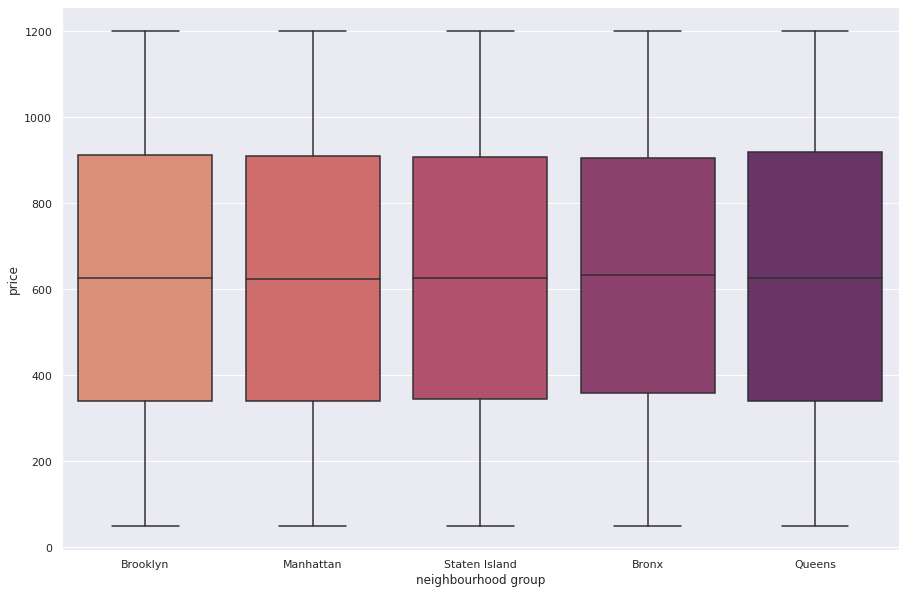

In [74]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(x="neighbourhood group", y="price", data=df_airnb,palette="flare")

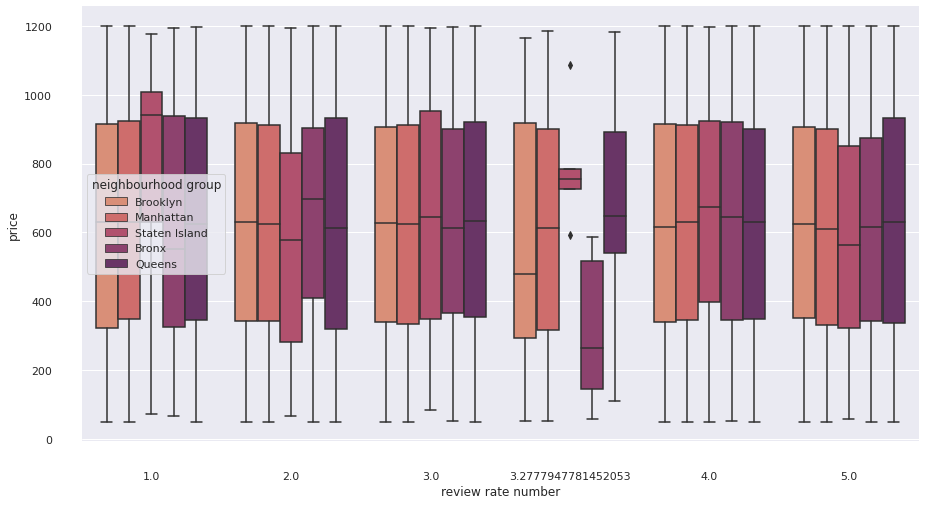

In [75]:
sns.boxplot(x="review rate number", y="price",
            hue="neighbourhood group", palette='flare',
            data=df_airnb)
sns.despine(offset=20, trim=True)

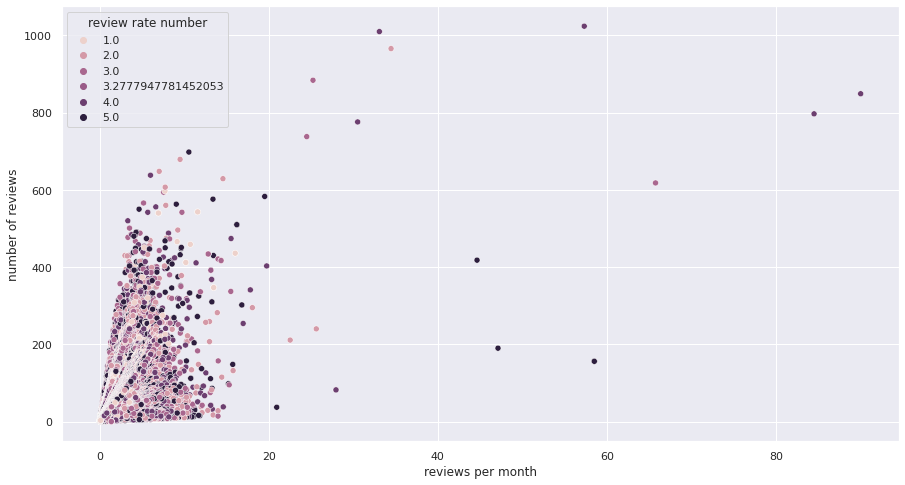

In [76]:
sns.scatterplot(x='reviews per month', y='number of reviews', data=df_airnb, hue='review rate number')

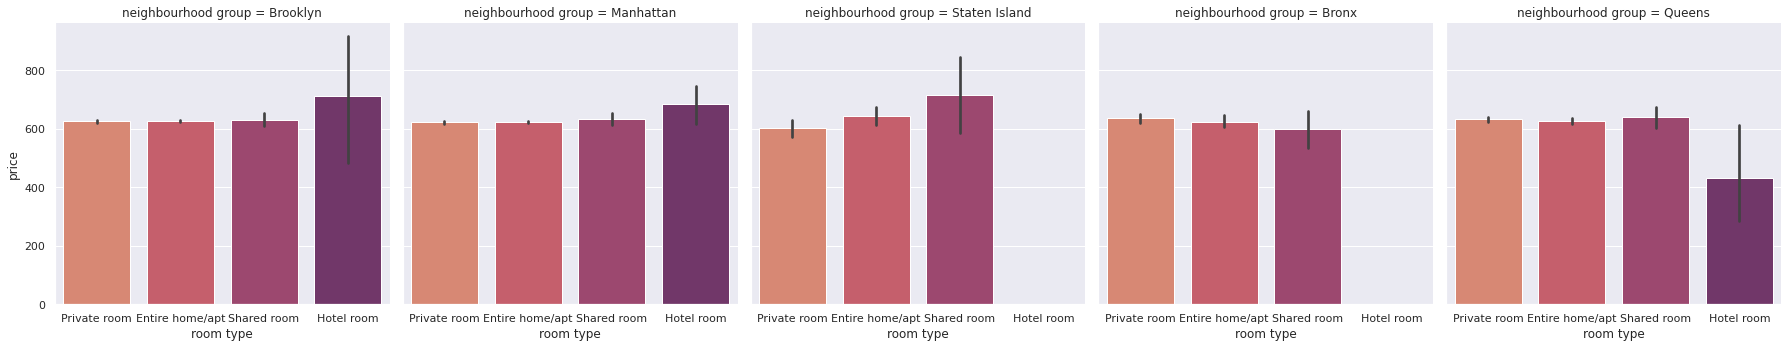

In [77]:
sns.catplot(x="room type", y="price", col="neighbourhood group", data=df_airnb, kind = "bar",palette='flare')

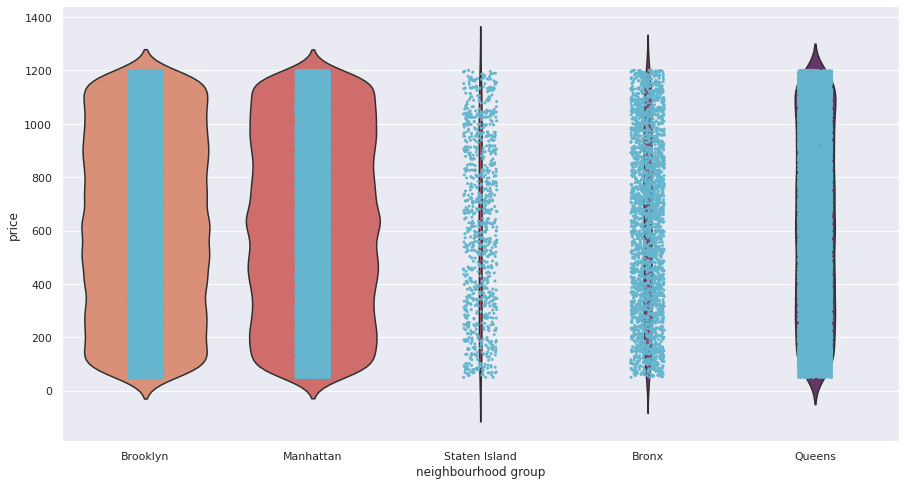

In [78]:
ax = sns.violinplot (x = 'neighbourhood group', y = 'price', data = df_airnb, palette = 'flare', scale = 'count', inner = None, whis = np.inf) # np.inf only infinity
ax=sns.stripplot(x='neighbourhood group',y='price',data=df_airnb,jitter=True,color='c',size=3)

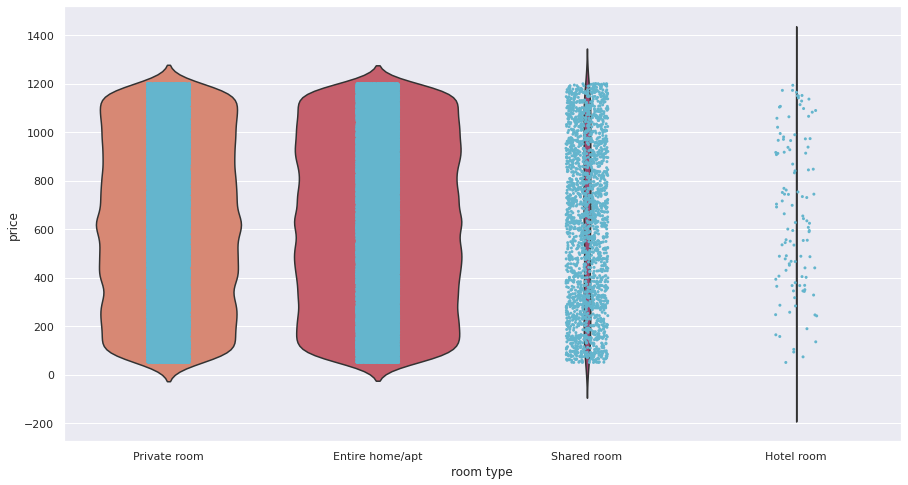

In [79]:
ax = sns.violinplot (x = 'room type', y = 'price', data = df_airnb, palette = 'flare', scale = 'count', inner = None, whis = np.inf) # np.inf only infinity
ax=sns.stripplot(x='room type',y='price',data=df_airnb,jitter=True,color='c',size=3)

# **Development and preprocessing of our model**

---



Choose the target **(y)** and the characteritics **(X):**

In [80]:
y = df_airnb['price']
X = df_airnb.drop(columns = 'price')

Make train test split to data

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.4)

As I have categorical variables it is necessary to scale data.

In [82]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

Perform one hot encoder encoding to our categorical characteristics

In [83]:
#cat_selector = make_column_selector(dtype_include='object')

Select column categoric

In [84]:
#cat_selector(X_train)

In [85]:
#train_cat_data = X_train[cat_selector(X_train)]
#test_cat_data = X_test[cat_selector(X_test)]
#train_cat_data.head()

Encoding One Hot

In [86]:
# Instanciar la codificación one-hot
#ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# Ajustar el OneHotEncoder en los datos de entrenamiento
#ohe_encoder.fit(train_cat_data)
# Transformar los datos de entrenamiento y de prueba
#train_ohe = ohe_encoder.transform(train_cat_data)
#test_ohe = ohe_encoder.transform(test_cat_data)
#train_ohe

In [87]:
#ohe_column_names = ohe_encoder.get_feature_names_out(train_cat_data.columns)
#train_ohe = pd.DataFrame(train_ohe, columns=ohe_column_names)
#test_ohe = pd.DataFrame(test_ohe, columns=ohe_column_names)
#train_ohe

Concatenate with our numeric columns

In [88]:
# Create a number picker
#num_selector = make_column_selector(dtype_include='number')
# Isolate the numerical columns
#train_nums = X_train[num_selector(X_train)].reset_index(drop=True)
#test_nums = X_test[num_selector(X_test)].reset_index(drop=True)
# Recombine the training and test sets on axis 1 (columns)
#X_train_processed = pd.concat([train_nums, train_ohe], axis=1)
#X_test_processed = pd.concat([test_nums, test_ohe], axis=1)
#X_train_processed

# **Make use of pipelines to preprocess the model**

In [89]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')


Ordinal encoding

In [90]:
df_airnb['cancellation_policy'].value_counts()

moderate    33666
strict      33441
flexible    33380
Name: cancellation_policy, dtype: int64

In [91]:
replacement_dictionary = {'moderate':2, 'strict':1, 'flexible':0}
df_airnb['cancellation_policy'].replace(replacement_dictionary, inplace=True)
df_airnb['cancellation_policy']

id
1001254     1
1002102     2
1002403     0
1002755     2
1003689     2
           ..
57361894    2
57362446    0
57362999    1
57363551    2
57367417    0
Name: cancellation_policy, Length: 100487, dtype: int64

In [92]:
df_airnb['cancellation_policy'].value_counts()

2    33666
1    33441
0    33380
Name: cancellation_policy, dtype: int64

***Column 'Cancellation Policy'is now a float and ordinal-encoded data type.***

Instantiate column selectors

In [93]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

Instantiate transformers

In [94]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
#Ordinal Encoder
ordinal_encoder = OrdinalEncoder()

Instantiate pipeline

In [95]:
numeric_pipe = make_pipeline(mean_imputer,scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [96]:
categorical_pipe = make_pipeline(freq_imputer,ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [97]:
nominal_pipe = make_pipeline(freq_imputer, ordinal_encoder)
nominal_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder', OrdinalEncoder())])

Instantiate column transform

In [98]:
# Tuples para Column Transformer
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
nominal_tuple = (nominal_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5dad719ca0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5dad719400>)])

Data transformer

In [99]:
preprocessor.fit(X_train)


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5dad719ca0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5dad719400>)])

Wrap the 2 transformers inside ColumnTransformer. We will use this adjusted ColumnTransformer to transform our training and test data sets.

In [100]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [101]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (60292, 248)




array([[-0.51456862, -0.93864538, -1.64519041, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.4223193 ,  0.27763469,  0.61338225, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.03276481, -0.4269857 ,  0.26590953, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.59908909,  3.61445765,  0.61338225, ...,  0.        ,
         1.        ,  0.        ],
       [-0.21695629, -0.1145635 , -1.47145405, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28374895,  0.03122003, -0.77650862, ...,  0.        ,
         0.        ,  0.        ]])

# **1.Linear Regression**

Import the regression model, I use it as first option because of my variable target is numeric

In [102]:
from sklearn.linear_model import LinearRegression

Instantiate the model

In [103]:
regression = LinearRegression()

Train the model on the training data.

In [104]:
regression.fit(X_train_processed,y_train)

LinearRegression()

Score the Model

In [105]:
train_score = regression.score(X_train_processed, y_train)
print(train_score)

0.9955941357501475


In [106]:
test_score = regression.score(X_test_processed, y_test)
print(test_score)

-1361287284906230.0


In [107]:
train_preds = regression.predict(X_train_processed)
test_preds = regression.predict(X_test_processed)

In [108]:
print(np.array(test_preds))

[ 431.70751953  598.96435547 1145.03759766 ...  215.05224609  506.12158203
  915.63525391]


In [109]:
print(np.array(y_test))

[ 432.  602. 1145. ...  214.  506.  918.]


# **1.1Regression Metrics**

In [110]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [111]:
r2_score(y_test, test_preds)


-1361287284906230.0

In [112]:
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

In [113]:
mse_train 
mse_test 

1.4954068195004757e+20

In [114]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [115]:
rmse_train 
rmse_test

12228682756.129034

# **2.Regression Tree**

Import the model of decision tree I want to use

In [116]:
from sklearn.tree import DecisionTreeRegressor

Instantiate the model

In [117]:
dec_tree = DecisionTreeRegressor(random_state = 42)

Fit the model using the training data.

In [118]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

Predict the target values for the training and test set

In [119]:
reg_train_preds = dec_tree.predict(X_train_processed)
reg_test_preds = dec_tree.predict(X_test_processed)

In [120]:
reg_train_preds

array([ 550.,  759.,  726., ...,  994., 1190., 1053.])

In [121]:
reg_test_preds

array([ 430.        ,  601.        , 1143.        , ...,  214.        ,
        507.        ,  625.35558044])

In [122]:
print(np.array(y_test))

[ 432.  602. 1145. ...  214.  506.  918.]


Score the model

In [123]:
reg_train_score = dec_tree.score(X_train_processed, y_train)
reg_test_score = dec_tree.score(X_test_processed, y_test)

In [124]:
reg_train_score 


0.9999676878386128

In [125]:
reg_test_score

0.9914780296737948

With a regression tree model, predicting the price per stay in arbnb is almost perfect, which can be seen with the 99.07% accuracy in the test set data.

In [168]:
dec_tree.get_depth()

45

In [169]:
dec_tree.get_n_leaves()

25150

**Finding the optimal max_depth (hyperparameter tuning)**

In [172]:
# List of values to test max_depth:
max_depth_range = list(range(2, 45))# will try every value between 2 and 45
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

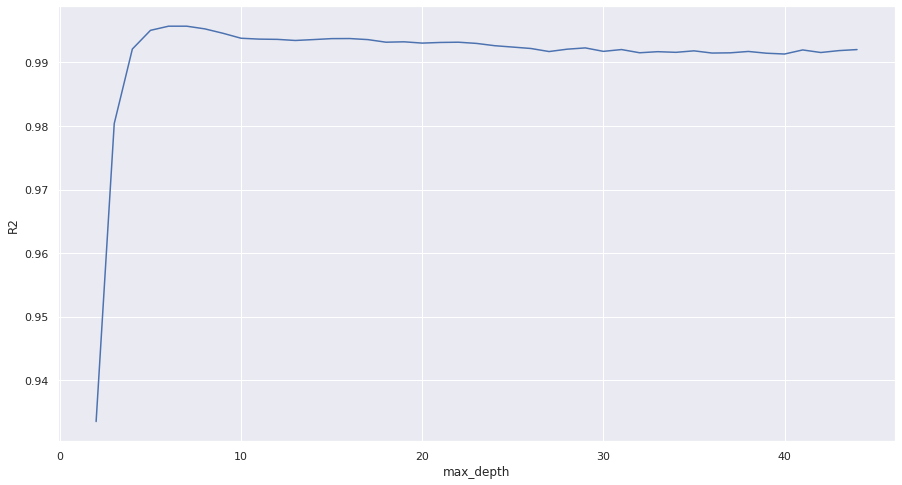

In [173]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

As we can see at the previous plot the best performance of the tree is when it reach 5 nodes, let's see.

In [177]:
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 52)
dec_tree_5.fit(X_train_processed, y_train)
train_5_score = dec_tree_5.score(X_train_processed, y_train)
test_5_score = dec_tree_5.score(X_test_processed, y_test)
print(train_5_score)
print(test_5_score)

0.9946579045106908
0.9950611190388907


In [178]:
dec_tree_3 = DecisionTreeRegressor(max_depth = 3, random_state = 32)
dec_tree_3.fit(X_train_processed, y_train)
train_3_score = dec_tree_3.score(X_train_processed, y_train)
test_3_score = dec_tree_3.score(X_test_processed, y_test)
print(train_3_score)
print(test_3_score)

0.9799864691570253
0.9803876547004333


It is noticeable when we reduce the number of nodes at 3 the score of our model decrease

# **3.Bagged Trees**

Import the model I want to use

In [126]:
from sklearn.ensemble import BaggingRegressor

Instantiate the model

In [147]:
bagged_reg = BaggingRegressor(random_state = 42, n_estimators= 7)

In [128]:
bagged_reg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 8,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Fit the bagged tree model in training data.

In [154]:
bagged_reg.fit(X_train_processed, y_train)

BaggingRegressor(n_estimators=7, random_state=42)

Make predictions under this model

In [155]:
bagged_reg.predict(X_test_processed)

array([ 429.71428571,  600.42857143, 1143.71428571, ...,  214.42857143,
        506.14285714,  876.90794006])

In [156]:
print(np.array(y_test))

[ 432.  602. 1145. ...  214.  506.  918.]


Score the model

In [157]:
bagged_reg_train_score = bagged_reg.score(X_train_processed, y_train)
bagged_reg_test_score = bagged_reg.score(X_test_processed, y_test)
print(bagged_reg_train_score)
print(bagged_reg_test_score)

0.9987692917084532
0.9951005622284523


With the tree bagging model we obtain an accuracy of 99.5% of the test set, a little higher than that obtained with a decision tree.

# **4.Random Forest**

Import the model

In [133]:
from sklearn.ensemble import RandomForestRegressor

Instantate the model I want to use

In [134]:
rf = RandomForestRegressor(random_state = 42)

Fit the model in training data

In [135]:
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

Make predictions under this model

In [166]:
rf.predict(X_test_processed).round(2)

array([ 429.99,  600.15, 1144.59, ...,  214.85,  505.03,  857.3 ])

In [137]:
print(np.array(y_test))

[ 432.  602. 1145. ...  214.  506.  918.]


Score the model used

In [138]:
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

0.9992253062541006
0.9954733334882657


After testing different regression models, such as decision tree, bagged tree, random forest, it is appropriate to say that our target PRICE variable is being predicted with an almost exact level in each of our models, highlighting the highest accuracy under the model random forest

In [182]:
rf_10 = RandomForestRegressor(max_depth = 10, random_state = 42)
rf_10.fit(X_train_processed, y_train)
rf_10_train_score = rf_10.score(X_train_processed, y_train)
rf_10_test_score = rf_10.score(X_test_processed, y_test)
print(rf_10_train_score)
print(rf_10_test_score)

0.9974469120414136
0.995567558039479


In [183]:
rf_30 = RandomForestRegressor(max_depth = 30, random_state = 42)
rf_30.fit(X_train_processed, y_train)
rf_30_train_score = rf_30.score(X_train_processed, y_train)
rf_30_test_score = rf_30.score(X_test_processed, y_test)
print(rf_30_train_score)
print(rf_30_test_score)

0.9991639466975737
0.9954734917072021


If we adjust the number of estimators it is slight but identifiable that the score of our model in test set doesn't improve slightly.

# **5.Neural Network**

In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

1.Define the structure of our network

In [159]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train_processed.shape[1]
input_shape

248

We work with a sequential model like this

In [160]:
# Sequential model
model = Sequential()

Now I have to add our hidden layers, then I can tune them (adding more layers)

In [161]:
# First hidden layer
model.add(Dense(18, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(15, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
                # Second hidden layer
# Third hidden layer              
model.add(Dense(12, # How many neurons you have in your third hidden layer
                activation = 'relu'))
# Fourth hidden layer
model.add(Dense(8, # How many neurons you have in your fourth hidden layer
                activation = 'relu'))
# Fith hidden layer
model.add(Dense(4, # How many neurons you have in your fourth hidden layer
                activation = 'relu'))

In [162]:
# Output layer
model.add(Dense(1, activation = 'linear'))

2.Compile the model

In [163]:
model.compile(loss = 'mse', optimizer = 'adam')

3.Fit the model in training data set

In [164]:
history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test), 
                    epochs=100)

Epoch 1/100
1885/1885 [==============================] - 6s 3ms/step - loss: 62472.4258 - val_loss: 512.0320
Epoch 2/100
1885/1885 [==============================] - 6s 3ms/step - loss: 512.3336 - val_loss: 565.7827
Epoch 3/100
1885/1885 [==============================] - 6s 3ms/step - loss: 510.5553 - val_loss: 455.0630
Epoch 4/100
1885/1885 [==============================] - 5s 3ms/step - loss: 511.9110 - val_loss: 458.3952
Epoch 5/100
1885/1885 [==============================] - 6s 3ms/step - loss: 509.6309 - val_loss: 517.3234
Epoch 6/100
1885/1885 [==============================] - 6s 3ms/step - loss: 508.3089 - val_loss: 484.8276
Epoch 7/100
1885/1885 [==============================] - 7s 4ms/step - loss: 508.4780 - val_loss: 464.0045
Epoch 8/100
1885/1885 [==============================] - 7s 3ms/step - loss: 506.6052 - val_loss: 459.3955
Epoch 9/100
1885/1885 [==============================] - 7s 4ms/step - loss: 508.7791 - val_loss: 461.6027
Epoch 10/100
1885/1885 [===========

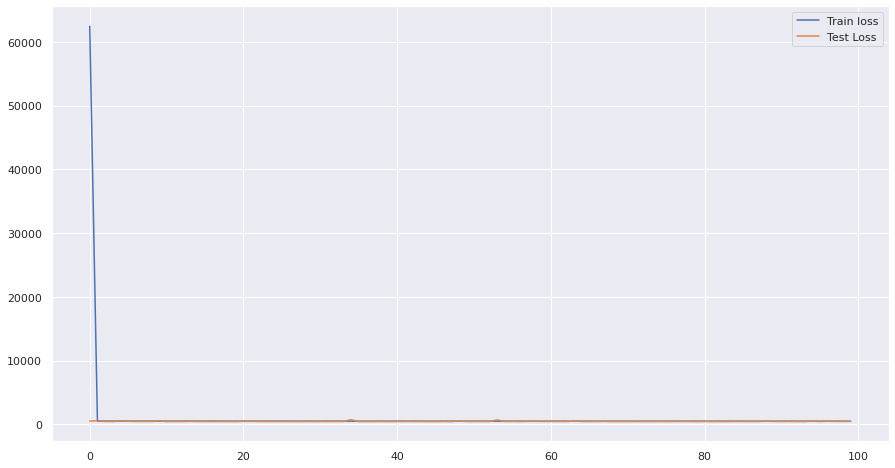

In [184]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

See the brief of the model here 